<a href="https://colab.research.google.com/github/drAshcroft/MAT421_Brian/blob/main/ModuleC_19_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

19.1 Computers can make approximating roots easier for difficult functions.  This is overkill for most education functions, but many functions from the real world require more help

r = [1.92603099]
function value at root= [-6.66133815e-16]


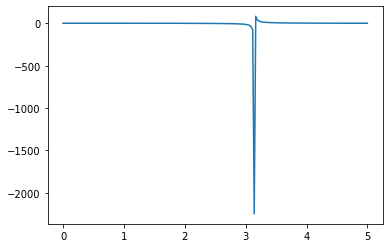

In [5]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#define a function that is interesting 
f = lambda x: np.cos(x)*np.tan(x/2) + .5
#this is a numerical solution, so estimate the root to make things faster
rEstimate = 3
r = optimize.fsolve(f, rEstimate)
print("r =", r)

# Verify the solution is a root
result = f(r)

xx=np.linspace(0,5,200)
plt.plot(xx,f(xx))
print("function value at root=", result)

We can consider the problem that the function has no roots. and also get more information about the attempt to find the root

r = [0.]
result= [1.]
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.


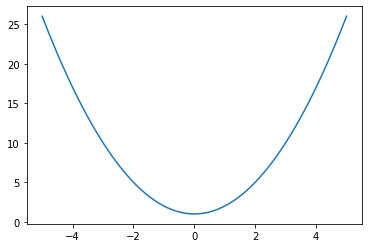

In [19]:
f = lambda x: x*x+1

r, infodict, ier, mesg = optimize.fsolve(f, 0, full_output=True)
print("r =", r)

result = f(r)
print("result=", result)
xx=np.linspace(-5,5,200)
plt.plot(xx,f(xx))
print(mesg)


19.2 Tolerance.    Tolerance determines how close to the correct answer we are willing to accept.  Since the programs are numerical, there will always be some error possible in the output.  Depending on the situation, this may result in a minima that is near the root to be selected

In [13]:
#same example as before. with no roots
f = lambda x: x*x+.01

#xtol tell the program when to stop
r, infodict, ier, mesg = optimize.fsolve(f, 10,xtol=.1, full_output=True)
print("r =", r) #finds the minimum, and the program stops

result = f(r)
print("distance from zero=", result)

print(mesg)

r = [0.01315962]
result= [0.01017318]
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.


In [17]:
#same example as before. with no roots but closer to zero
f = lambda x: x*x+1.49012e-08/10

#xtol tell the program when to stop
r, infodict, ier, mesg = optimize.fsolve(f, 10, full_output=True)
print("r =", r) #finds the minimum, and the program stops

result = f(r)
print("distance from zero=", result)

print(mesg)

r = [-1.768149e-06]
distance from zero= [1.49324635e-09]
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.


19.3 Bisection 

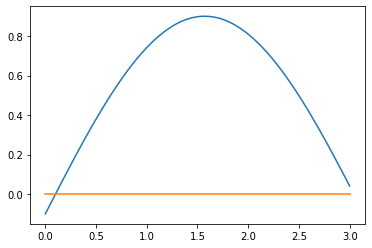

In [24]:
f = lambda x: np.sin(x) - .1

xx=np.linspace(0,3,200)
plt.plot(xx,f(xx))
plt.plot(xx,[0]*len(xx))

in short, a continuous function that changes signs between two points, must pass through a root.  We can use this intermediate value theorom to perform a tree search for the root.

In [23]:
def my_bisection(f, a, b, tol): 
    # approximates a root, R, of f bounded 
    # by a and b to within tolerance 
    # | f(m) | < tol with m the midpoint 
    # between a and b Recursive implementation
    
    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")
        
    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

r1 = 0.125
r01 = 0.09375
f(r1) = 0.024674733385227687
f(r01) = -0.006387268764487114


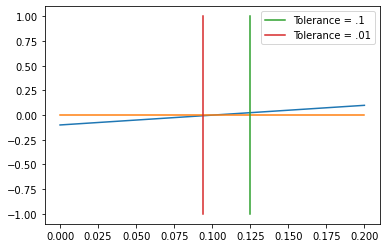

In [29]:
f = lambda x: np.sin(x) - .1

r1 = my_bisection(f, 0, 2, 0.1)
print("r1 =", r1)
r01 = my_bisection(f, 0, 2, 0.01)
print("r01 =", r01)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))

xx=np.linspace(0,.2,200)
plt.plot(xx,f(xx))
plt.plot(xx,[0]*len(xx))
plt.plot([r1,r1],[-1,1],label='Tolerance = .1')
plt.plot([r01,r01],[-1,1],label='Tolerance = .01')

plt.legend()
plt.show()

This method can be easily confused if there is two roots between the selected initial points

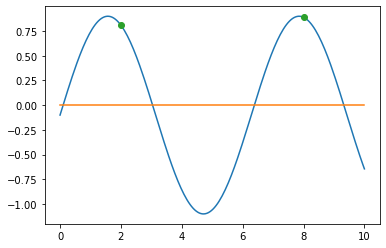

Exception: ignored

In [36]:
f = lambda x: np.sin(x) - .1

xx=np.linspace(0,10,200)
plt.plot(xx,f(xx))
plt.plot(xx,[0]*len(xx))
plt.plot([2,8],[f(2),f(8)],'o')
 
plt.show()

r1 = my_bisection(f, 2, 8, 0.01)
print("r1 =", r1)
print("f(r1) =", f(r1))


The bisection method works to find the root, and the tolerance concept is also nicely illustrated with the stopping condition for the search

19.4 Newton-Raphson Method.  This method is similar to what we learned in high school for finding roots.  It assumes that the slope of the line will provide a good estimate for the location of the root.  By iterating this, the root can be found within a certain confidence

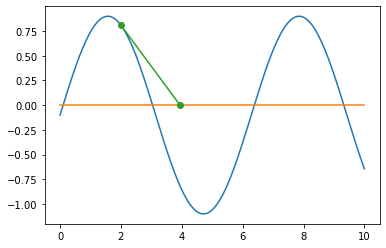

In [42]:
def NewtonRaphsonStep(f,fprime, x):
  return x-f(x)/fprime(x)

f = lambda x: np.sin(x) - .1
fprime = lambda x: np.cos(x)

x=2
xn=NewtonRaphsonStep(f,fprime, x)

xx=np.linspace(0,10,200)
plt.plot(xx,f(xx))
plt.plot(xx,[0]*len(xx))
plt.plot([2,xn],[f(2),0],'o-')
 
plt.show()



The step has made an estimate for the correct root.  Now it can be iterated

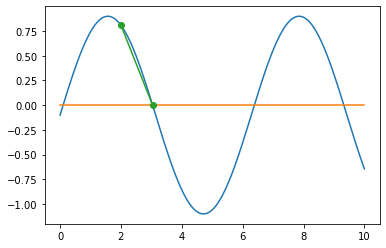

In [52]:
def NewtonRaphsonRoots(f,fprime, x0, tolerance):
  curTol = tolerance*2
  cc=0
  x=x0
  while (curTol>tolerance and cc<4000):
    x=NewtonRaphsonStep(f,fprime, x)
    curTol=np.abs(f(x))
    cc+=1
  if cc==4000:
    raise Exception("Unable to converge to root,  use a better initial root")
  return x

xn=NewtonRaphsonRoots(f,fprime, 2, .00001)

xx=np.linspace(0,10,200)
plt.plot(xx,f(xx))
plt.plot(xx,[0]*len(xx))
plt.plot([2,xn],[f(2),0],'o-')
 
plt.show()


Unexpected results can be created by selected an initial root where the slope is close to 0

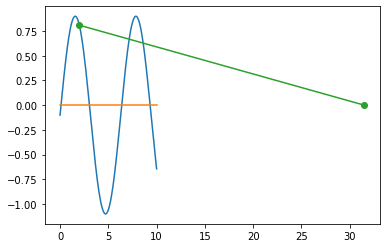

In [55]:
xn=NewtonRaphsonRoots(f,fprime, 1.6, .00001)

xx=np.linspace(0,10,200)
plt.plot(xx,f(xx))
plt.plot(xx,[0]*len(xx))
plt.plot([2,xn],[f(2),0],'o-')
 
plt.show()

The method may also be unable to find a root due to local minima or difficult landscapes in the selected function

Exception: ignored

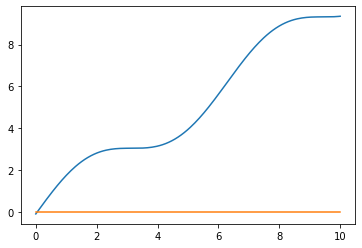

In [57]:
f = lambda x: np.sin(x)+x - .1
fprime = lambda x: np.cos(x)

plt.plot(xx,f(xx))
plt.plot(xx,[0]*len(xx))

xn=NewtonRaphsonRoots(f,fprime, 1.6, .00001)

xx=np.linspace(0,10,200)

plt.plot([2,xn],[f(2),0],'o-')
 
plt.show()

19.5 Built in root solving.  Python provides a number of tools for finding solutions.  A simple example is fsolve which is similar to many other programming languages.  This is designed to handle some of the common pitfalls illustrated by the previous examples

r = [0.05001042]
function value at root= [0.]


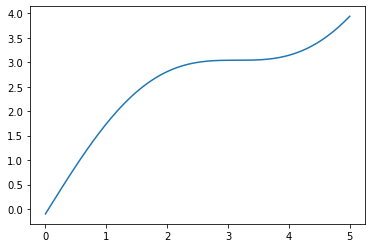

In [59]:
#this is a numerical solution, so estimate the root to make things faster
rEstimate = 1.6
r = optimize.fsolve(f, rEstimate)
print("r =", r)

# Verify the solution is a root
result = f(r)

xx=np.linspace(0,5,200)
plt.plot(xx,f(xx))
print("function value at root=", result)